In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from nets import *
from cfgs import *
from data import *
from clip_ops.clip_ops import *
from trainer import *

In [2]:
%matplotlib inline
save_plot = False
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
D = 501

x = np.linspace(0, 1.0, D)
X_tst = np.stack([v.flatten() for v in np.meshgrid(x,x)], axis = -1)
X_tst = np.expand_dims(X_tst, 1)
X_tst[:,:,0] = X_tst[:,:,0] * 12.0 + 4.0
X_tst[:,:,1] = X_tst[:,:,1] * 3.0 + 4.0
print(X_tst.shape)

cfg = additive_1x2_uniform_416_47_config.cfg
cfg.test.num_misreports = 1
cfg.test.gd_iter = 0
cfg.test.batch_size = D
cfg.test.num_batches = int(X_tst.shape[0]/cfg.test.batch_size)
cfg.test.save_output = True

(251001, 1, 2)


In [3]:
Net = additive_net.Net
Generator = uniform_416_47_generator.Generator
clip_op_lambda = (lambda x: clip_op_416_47(x))
Trainer = trainer.Trainer

In [4]:
net = Net(cfg)
generator = Generator(cfg, 'test', X_tst)
clip_op_lambda = (lambda x: tf.assign(x, tf.clip_by_value(x, 0.0, 1.0)))
m = Trainer(cfg, "test", net, clip_op_lambda)
m.test(generator)

INFO:tensorflow:Restoring parameters from experiments/additive_1x2_uniform_416_47/model-400000


2019-02-11 01:23:36,890:INFO:Restoring parameters from experiments/additive_1x2_uniform_416_47/model-400000
2019-02-11 01:23:40,717:INFO:TEST BATCH-0: t = 3.7899, Revenue: 7.949028, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:40,726:INFO:TEST BATCH-1: t = 3.7949, Revenue: 7.955817, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:40,735:INFO:TEST BATCH-2: t = 3.7998, Revenue: 7.962608, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:40,743:INFO:TEST BATCH-3: t = 3.8044, Revenue: 7.969400, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:40,751:INFO:TEST BATCH-4: t = 3.8091, Revenue: 7.976192, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:40,758:INFO:TEST BATCH-5: t = 3.8133, Revenue: 7.982986, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:40,766:INFO:TEST BATCH-6: t = 3.8175, Revenue: 7.989780, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:40,772:INFO:TEST BATCH-7: t = 3.8214, Revenue: 7.996576, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:40,779:INFO:TEST BATCH-8: t

2019-02-11 01:23:41,265:INFO:TEST BATCH-76: t = 4.1157, Revenue: 8.472761, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:41,272:INFO:TEST BATCH-77: t = 4.1198, Revenue: 8.479846, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:41,279:INFO:TEST BATCH-78: t = 4.1238, Revenue: 8.486938, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:41,286:INFO:TEST BATCH-79: t = 4.1279, Revenue: 8.494037, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:41,293:INFO:TEST BATCH-80: t = 4.1320, Revenue: 8.501144, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:41,299:INFO:TEST BATCH-81: t = 4.1361, Revenue: 8.508259, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:41,306:INFO:TEST BATCH-82: t = 4.1402, Revenue: 8.515382, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:41,313:INFO:TEST BATCH-83: t = 4.1442, Revenue: 8.522513, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:41,320:INFO:TEST BATCH-84: t = 4.1482, Revenue: 8.529653, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:41,327:INFO:TEST BAT

2019-02-11 01:23:41,702:INFO:TEST BATCH-153: t = 4.3752, Revenue: 9.045664, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:41,707:INFO:TEST BATCH-154: t = 4.3779, Revenue: 9.053503, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:41,711:INFO:TEST BATCH-155: t = 4.3811, Revenue: 9.061354, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:41,716:INFO:TEST BATCH-156: t = 4.3842, Revenue: 9.069215, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:41,721:INFO:TEST BATCH-157: t = 4.3875, Revenue: 9.077085, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:41,725:INFO:TEST BATCH-158: t = 4.3907, Revenue: 9.084967, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:41,730:INFO:TEST BATCH-159: t = 4.3944, Revenue: 9.092857, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:41,735:INFO:TEST BATCH-160: t = 4.3976, Revenue: 9.100758, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:41,740:INFO:TEST BATCH-161: t = 4.4017, Revenue: 9.108667, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:41,745:INFO

2019-02-11 01:23:42,059:INFO:TEST BATCH-229: t = 4.6345, Revenue: 9.664953, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:42,063:INFO:TEST BATCH-230: t = 4.6377, Revenue: 9.673335, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:42,068:INFO:TEST BATCH-231: t = 4.6413, Revenue: 9.681720, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:42,073:INFO:TEST BATCH-232: t = 4.6445, Revenue: 9.690106, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:42,077:INFO:TEST BATCH-233: t = 4.6477, Revenue: 9.698499, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:42,082:INFO:TEST BATCH-234: t = 4.6512, Revenue: 9.706893, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:42,086:INFO:TEST BATCH-235: t = 4.6545, Revenue: 9.715293, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:42,092:INFO:TEST BATCH-236: t = 4.6585, Revenue: 9.723696, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:42,096:INFO:TEST BATCH-237: t = 4.6617, Revenue: 9.732103, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:42,101:INFO

2019-02-11 01:23:42,416:INFO:TEST BATCH-305: t = 4.8949, Revenue: 10.304966, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:42,421:INFO:TEST BATCH-306: t = 4.8987, Revenue: 10.312673, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:42,426:INFO:TEST BATCH-307: t = 4.9024, Revenue: 10.320281, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:42,431:INFO:TEST BATCH-308: t = 4.9063, Revenue: 10.327788, Regret: 0.000002, IRP: 0.000000
2019-02-11 01:23:42,436:INFO:TEST BATCH-309: t = 4.9097, Revenue: 10.335185, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:42,441:INFO:TEST BATCH-310: t = 4.9135, Revenue: 10.342463, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:42,445:INFO:TEST BATCH-311: t = 4.9166, Revenue: 10.349615, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:42,450:INFO:TEST BATCH-312: t = 4.9199, Revenue: 10.356634, Regret: 0.000001, IRP: 0.000000
2019-02-11 01:23:42,454:INFO:TEST BATCH-313: t = 4.9231, Revenue: 10.363513, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:42

2019-02-11 01:23:42,782:INFO:TEST BATCH-381: t = 5.1651, Revenue: 10.553921, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:42,787:INFO:TEST BATCH-382: t = 5.1683, Revenue: 10.554854, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:42,792:INFO:TEST BATCH-383: t = 5.1724, Revenue: 10.555774, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:42,797:INFO:TEST BATCH-384: t = 5.1756, Revenue: 10.556682, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:42,801:INFO:TEST BATCH-385: t = 5.1789, Revenue: 10.557578, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:42,806:INFO:TEST BATCH-386: t = 5.1821, Revenue: 10.558463, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:42,810:INFO:TEST BATCH-387: t = 5.1853, Revenue: 10.559337, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:42,815:INFO:TEST BATCH-388: t = 5.1892, Revenue: 10.560201, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:42,820:INFO:TEST BATCH-389: t = 5.1925, Revenue: 10.561053, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:42

2019-02-11 01:23:43,136:INFO:TEST BATCH-457: t = 5.4162, Revenue: 10.608165, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:43,141:INFO:TEST BATCH-458: t = 5.4194, Revenue: 10.608802, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:43,146:INFO:TEST BATCH-459: t = 5.4227, Revenue: 10.609437, Regret: 0.000001, IRP: 0.000000
2019-02-11 01:23:43,150:INFO:TEST BATCH-460: t = 5.4258, Revenue: 10.610076, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:43,155:INFO:TEST BATCH-461: t = 5.4290, Revenue: 10.610713, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:43,159:INFO:TEST BATCH-462: t = 5.4321, Revenue: 10.611351, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:43,164:INFO:TEST BATCH-463: t = 5.4353, Revenue: 10.611989, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:43,168:INFO:TEST BATCH-464: t = 5.4384, Revenue: 10.612628, Regret: 0.000000, IRP: 0.000000
2019-02-11 01:23:43,173:INFO:TEST BATCH-465: t = 5.4417, Revenue: 10.613267, Regret: 0.000001, IRP: 0.000000
2019-02-11 01:23:43

In [5]:
alloc = np.load(os.path.join(cfg.dir_name, "alloc_tst_" + str(cfg.test.restore_iter) + ".npy")).reshape(D,D,2)
pay = np.load(os.path.join(cfg.dir_name, "pay_tst_" + str(cfg.test.restore_iter) + ".npy")).reshape(D,D,1)

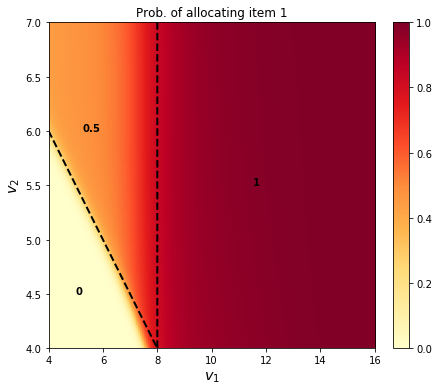

In [6]:
points = [(4, 6), (8, 4), (8, 7)]
x = list(map(lambda x: x[0], points))
y = list(map(lambda x: x[1], points))
        
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(8,6))

plt.plot(x, y, linewidth = 2, linestyle = '--', c='black')
img = ax.imshow(alloc[::-1, :, 0], extent=[4,16,4,7], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd', aspect=4)
                    
plt.text(5, 4.5, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(5.25, 6, s='0.5', color='black', fontsize='10', fontweight='bold')
plt.text(11.5, 5.5, s='1', color='black', fontsize='10', fontweight='bold')

ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 1')
plt.colorbar(img, fraction=0.046, pad=0.04)
if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc1.pdf'), bbox_inches = 'tight', pad_inches = 0.05)

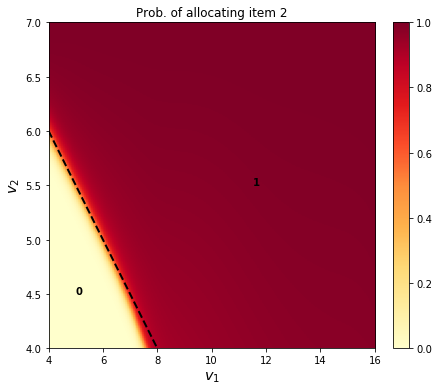

In [7]:
points = [(4, 6), (8, 4)]

x = list(map(lambda x: x[0], points))
y = list(map(lambda x: x[1], points))
        
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(8,6))

plt.plot(x, y, linewidth = 2, linestyle = '--', c='black')
img = ax.imshow(alloc[::-1, :, 1], extent=[4,16,4,7], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd', aspect=4)
                    
plt.text(5, 4.5, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(11.5, 5.5, s='1', color='black', fontsize='10', fontweight='bold')

ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 2')
plt.colorbar(img, fraction=0.046, pad=0.04)
if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc2.pdf'), bbox_inches = 'tight', pad_inches = 0.05)